## Analysis
1) There is a strong correlation bewteen latitude and temperature. The latitudes closer to the equater have higher temperatures and  latitudes farther away from the equator have lower temperatures.

2) There could be a mild correlation between humidity and latitude. There appears to be a slight funneling affect; as the equator is approached there appear to more instances of lower humidity.

3)There is no observable correlation between cloudiness and latitude. This could partially result from the way cloudiness is measured and reported

4)There does not appear to be an observable correlation between latitude and wind speed.

In [1]:
# Dependencies
import csv
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from api_keys import api_key
import time
import json

## Perform API Calls

In [2]:
# Save config information.
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #country = 
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print((len(cities)), 'cities have been generated')

642 cities have been generated


## Create Lists, Append Data

In [6]:
cityNum = 1
eq_cities = []
lat = []
temp = []
humid = []
cloudy = []
windy = []

for city in cities:
    time.sleep(0.33)
    
#     # Comparing cites generated, loops performed, cities appended
    print(f"City Number: {cityNum}")
    cityNum=cityNum+1

#     # Create endpoint URL with each city
    city_url = query_url + city
    print(city_url)
    print('-----------------------------')

    try:
        response = requests.get(query_url + city).json()
        
        eq_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])


    except:
        print("We've tied, but can't find,", city)
        print('------------------------------------------')
        pass
#         print('no number', lat)


print('Iteration Complete')
print('Cities originally generated =',(len(cities)))
print('Cities retained =', (len(eq_cities)))
print('Lats =', (len(lat)))
print('Temps =', (len(temp)))
print('Humidity =', (len(humid)))
print('Clouds =', (len(cloudy)))
print('Windy =', (len(windy)))

City Number: 1
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=chuy
-----------------------------
City Number: 2
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lipin bor
-----------------------------
City Number: 3
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rikitea
-----------------------------
City Number: 4
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kapaa
-----------------------------
City Number: 5
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mahebourg
-----------------------------
City Number: 6
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=punta arenas
-----------------------------
City Number: 7
http://api.openweathermap.org/data/2.5/weathe

## Display the City Dataframe

In [7]:
# create a data frame from cities, lat, and temp
#eq_weather = {
eq_data = pd.DataFrame({
    'city': eq_cities,
    'lat': lat,
    'temp': temp,
    'humid': humid,
    'cloudy': cloudy,
    'windy': windy
})

#eq_cities = pd.DataFrame(eq_cities)
eq_data.head()

,city,cloudy,humid,lat,temp,windy
0,Chuy,80,96,-33.69,57.32,13.00
1,Lipin Bor,0,100,60.26,57.14,6.62
2,Rikitea,12,100,-23.12,74.11,8.86
3,Kapaa,1,69,22.08,80.60,18.34
4,Mahebourg,40,82,-20.41,68.00,5.82


In [8]:
# Output File (CSV)
#output_data_file = "Temp_output/cities.csv"
eq_data.to_csv("EquitorialWeatherData.csv", index=False)

## Latitude vs Temperature Plot

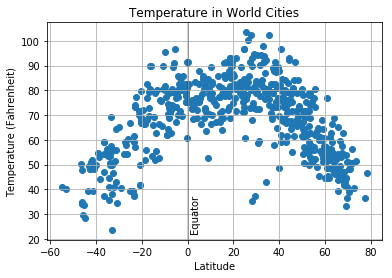

In [9]:
# Build a scatter plot for each data type
plt.scatter(eq_data["lat"], eq_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Humidity Plot

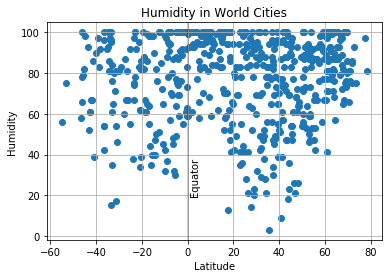

In [10]:
# Build a scatter plot for each data type
plt.scatter(eq_data["lat"], eq_data["humid"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Cloudiness Plot

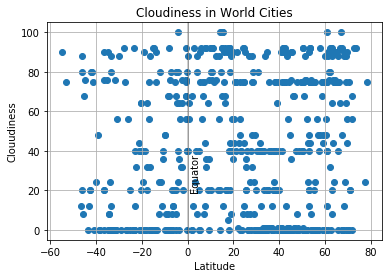

In [11]:
# Build a scatter plot for each data type
plt.scatter(eq_data["lat"], eq_data["cloudy"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Clouudiness")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs Wind Speed Plot

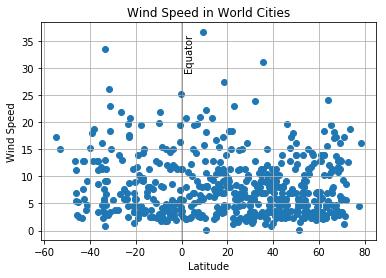

In [12]:
# Build a scatter plot for each data type
plt.scatter(eq_data["lat"], eq_data["windy"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator')
plt.text(1,35,'Equator',rotation=90)
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()